<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/CircuitElement_inductance_EnergyPower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Energy and Power for Inductance</h1></b>

Dr. Bingsen Wang

9/28/2024
</center>

#Energy Stored in an Inductor

Given the current $i_L$ through an inductor, the energy $e_L$ stored in the magnetic field is
$$\begin{align}
e_L &= \frac{1}{2}Li_L^2 \tag{1}\\
\end{align} $$

#Instantaneous Power

The instantaneous power $p_L$ delivered to the indcuctance is
$$p_L=\frac{de_L}{dt} \tag{2}$$



#Python Code
The Python code illustrates the power varies if the frequency frequency varies for the same current amplitude.

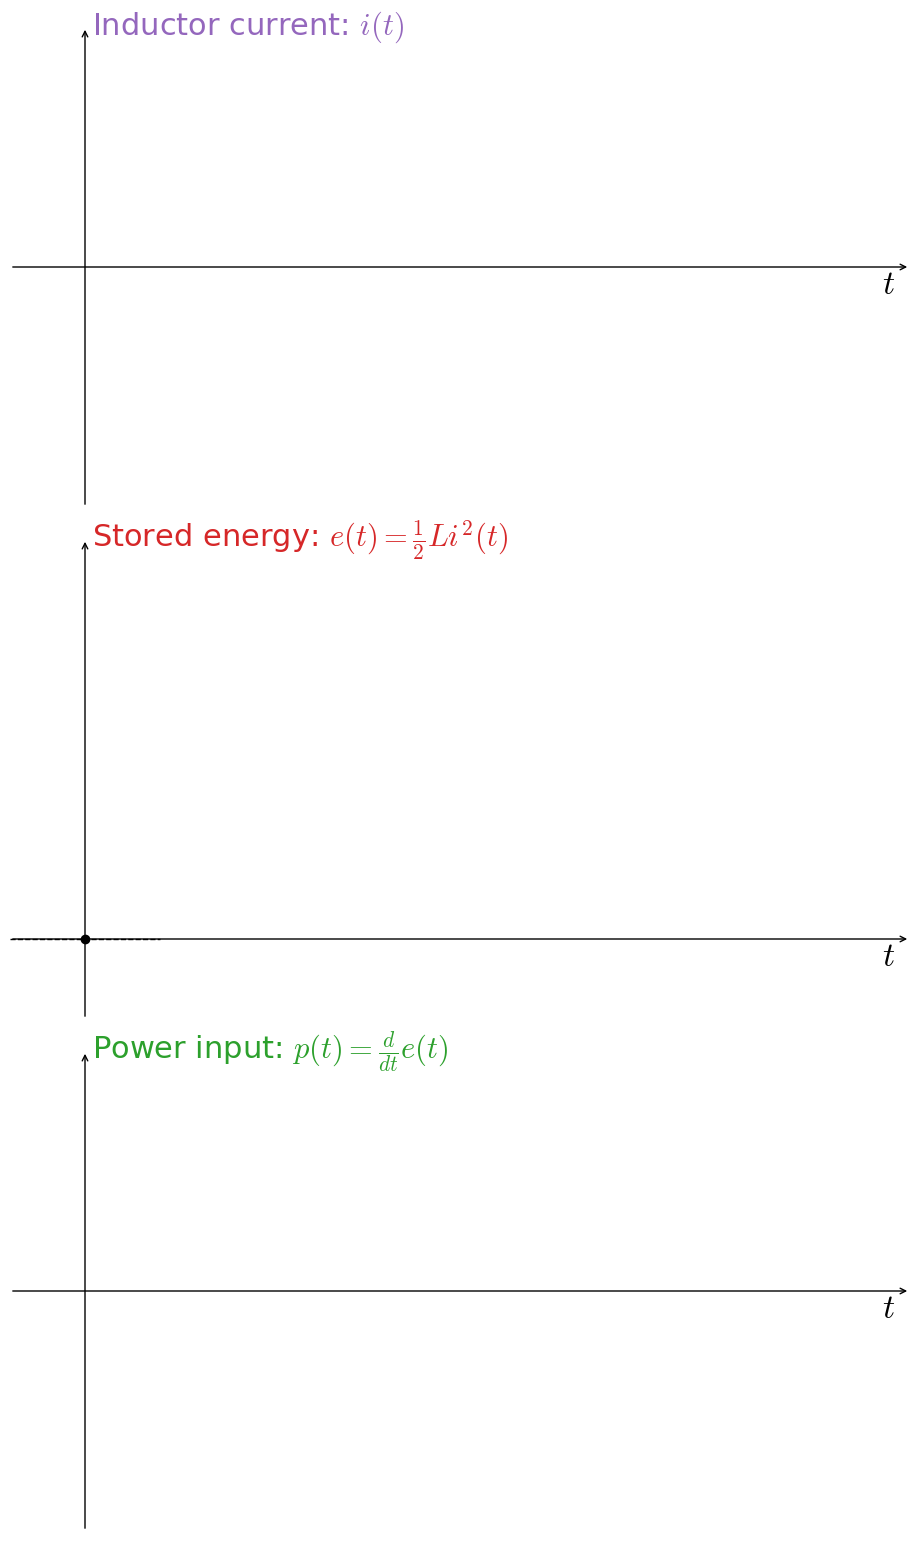

In [30]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

#parameters
Nf = 600
t=linspace(0,1,Nf,endpoint=False)
L = .5/pi

fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_lbl=[[r'Power input: $p(t)=\frac{d}{dt}e(t)$', '$t$'],
        [r'Stored energy: $e(t)=\frac{1}{2}Li^2(t)$', '$t$'],
        [r'Inductor current: $i(t)$', '$t$'],
        ] #variables for yx axes of each subplot
clst=list(mpl.cm.tab10.colors)[2:] #colors of lines
ax_lst,lines=[],[]
for k in range(3):
  xn,xm = -.1,1.1 #axis limits
  if k==1:
    yn,ym = -.02,.1
  else:
    yn,ym = -1.1,1.1
  ax=fig.add_axes([0,.32*k,1,.3],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  lines.append(ax.plot([], [], color=clst[k], lw=3)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  ax.text(0.01,ym,ax_lbl[k][0],size=22,va='center',color=clst[k]) #y label
lines.append(ax_lst[1].plot([], [], '--k', lw=1)[0]) #tangential line
lines.append(ax_lst[1].scatter([], [], marker='o',c='k')) #tangential line

def animate(ii):
  i=ii%Nf
  f = 1+int(ii/Nf)
  iL = sin(2*pi*f*t[:i+1])
  et = .5*L*iL**2
  pt=pi*f*L*sin(4*pi*f*t[:i+1])
  lines[0].set_data(t[:i+1],pt)
  lines[1].set_data(t[:i+1],et)
  lines[2].set_data(t[:i+1],iL)
  lines[3].set_data([t[i]-.1,t[i]+.1],[et[-1]-.1*pt[-1],et[-1]+.1*pt[-1]])
  lines[4].set_offsets([t[i],et[-1]])
  return

anim = animation.FuncAnimation(fig, animate, interval=100, frames=Nf*2)
# anim #uncomment to generate animation in the output area
anim.save("circuitElement_inductanceEnergyPower.mp4", writer=animation.FFMpegWriter(fps=60), dpi = 200)